In [2]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

import numpy as np
from scipy import stats

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing CSV file
df = pd.read_csv('/home/eric/Documents/datascience-class/Assignment_7/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

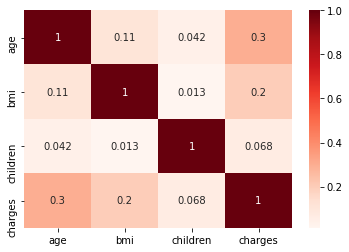

In [8]:
# Showing correlataion using a heatmap
plt.figure
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The target column is continous in nature, a regression approach is reqquired in conducting the predictive analysis

In [9]:
# Checking for Null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [10]:
# Checking for duplicates 
df_duplicates = df.duplicated().sum()
df_duplicates

1

In [11]:
# Checking for Duplicated row
duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
# Dropping the duplicate column
df.drop_duplicates(keep= False, inplace = True )

In [13]:
#Checking the duplicates 
duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges


In [14]:
df.shape

(1336, 7)

In [15]:
# making a copy of the Dataframe
df_copy = df.copy()

In [16]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 1080x432 with 0 Axes>

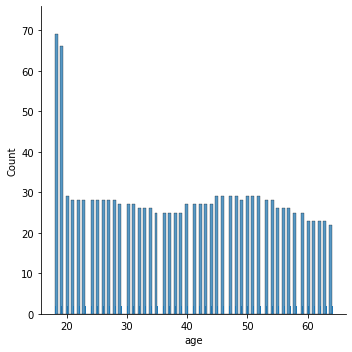

In [17]:
# Q3
plt.figure(figsize=(15, 6))
sns.displot(x=df_copy['age'], kde=False, rug=True, bins=100)
plt.show()

The majority of the individuals captured are young below 20 years and a balance of individuals between the ages 30 to 70 years.

In [18]:
# Set & Feature Scaling
#X = df_copy.iloc[:,:-1].values
#y = df_copy.iloc[:,6].values

In [19]:
# Using LabelEncoder to convert sex to numerical data
#from sklearn.preprocessing import LabelEncoder

#lb_encode = LabelEncoder()
#X[:,1] = lb_encode.fit_transform(X[:,1])

In [20]:
# Converting Smoker to numerical data 
#from sklearn.preprocessing import LabelEncoder

#lb_encode = LabelEncoder()
#X[:,4] = lb_encode.fit_transform(X[:,4])


In [21]:
# Encoding the region column
#from sklearn.preprocessing import LabelEncoder

#lb_encode = LabelEncoder()
#X[:,5] = lb_encode.fit_transform(X[:,5])

In [22]:
# Setting up 
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [23]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
# Q4 Isolating all continous and discrete columns 
numerical_continous = []
for column in df_copy.columns:
    if df_copy[column].dtypes != 'object':
        if df_copy[column].nunique()> 10:
            numerical_continous.append(column)
numerical_continous.remove('charges')
numerical_continous

['age', 'bmi']

Age and Bmi columns are the identified numerical continous 

In [25]:
# Numerical Discrete 
numerical_discrete = []
for column in df_copy.columns:
    if df_copy[column].dtypes != 'object':
        if df_copy[column].nunique() < 10:
            numerical_discrete.append(column)

numerical_discrete

['children']

Children columns identified as the numerical discrete 

In [26]:
# Q5 identiying presence of any outliers in the numerical continous columns
# df_data = pd.DataFrame(numerical_continous)

In [27]:
# df_data.boxplot()

<AxesSubplot:>

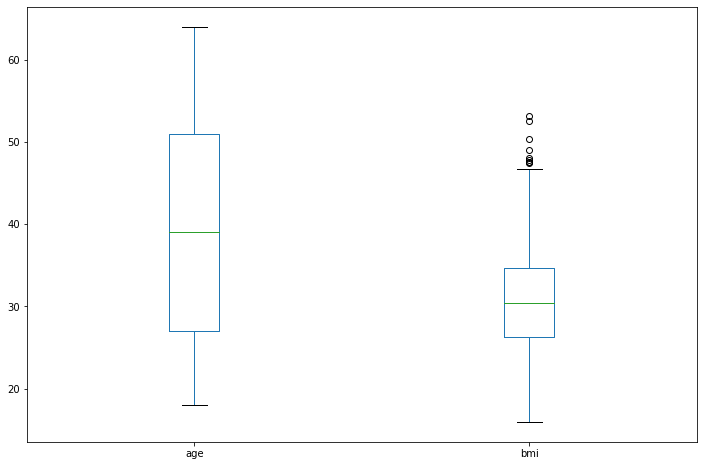

In [28]:
df_copy[numerical_continous].plot(kind = 'box', figsize = (12,8))

In [29]:
#from scipy import stats
# zscore = np.abs(stats.zscore(df_data))
# zscore

<AxesSubplot:>

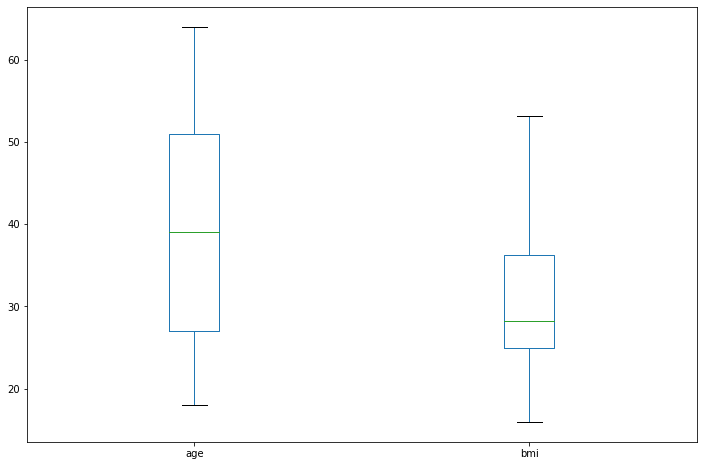

In [30]:
threshold = 0.3703
zscore = np.abs(stats.zscore(df_copy[['bmi']]))
df_copy[(zscore > threshold).all(axis=1)][numerical_continous].plot(kind = 'box', figsize =(12,8))

In [31]:
# Implementing the changes 
df_copy = df_copy[(zscore > threshold).all(axis = 1)]

In [32]:
df.shape

(1336, 7)

In [33]:
df_copy.shape

(971, 7)

In [34]:
# Q7. Isolating all categorical columns 
categorical = []
for column in df_copy.columns:
    if df_copy[column].dtypes == 'object':
        categorical.append(column)
categorical

['sex', 'smoker', 'region']

sex, smoker and region identified as categorical columns

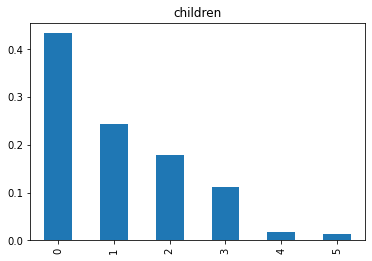

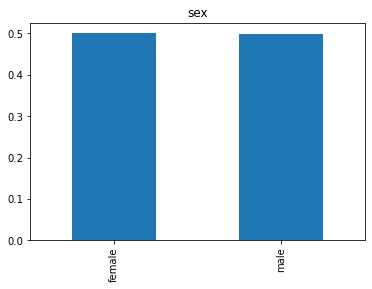

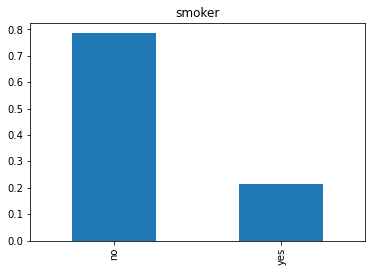

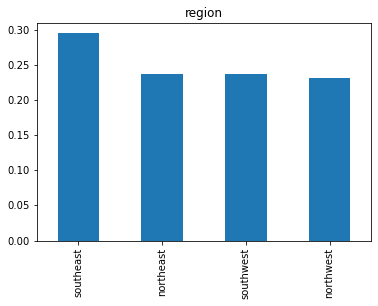

In [35]:
# Visually identifying outliers in the discrete and categorical features
for column in numerical_discrete + categorical:
    (df_copy[column].value_counts()/df_copy[column].shape[0]).plot(kind='bar')
    plt.title(column)
    plt.show()

In [36]:
# def rare_imputation(variable):
    # find frequent labels / discrete numbers
#    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
#    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
#    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
#    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
#    test[variable] = np.where(test[variable].isin(frequent_cat), test[variable], 'Rare')

In [37]:
df_copy['children'] = df_copy['children'].replace([3,4,5], 'Rare')

In [38]:
# df_copy2 = df.copy()

In [39]:
#Q 9 Encode the discrete and categorical features with one of the measures of central tendency
#def encode_cat_vars(var,target):
#    ordered_labels = df_copy.groupby([var])[target].mean().to_dict()
#    df_copy[var] = df_copy[var].map(ordered_labels)
    
#for var in categorical:
#    encode_cat_vars(var, 'charges')
#for var in numerical_discrete:
#    encode_cat_vars(var, 'charges')
    
# df_copy.head()

In [40]:
#Q 9 Encode the discrete and categorical features with one of the measures of central tendency
encoded_features = {}
for column in numerical_discrete + categorical:
    encoded_features[column] = df_copy.groupby([column])['charges'].median().to_dict()
    df_copy[column] = df_copy[column].map(encoded_features[column])

In [41]:
encoded_features

{'children': {0: 9644.2525, 1: 8539.671, 2: 9954.0544, 'Rare': 10977.2063},
 'sex': {'female': 9639.395250000001, 'male': 9391.346},
 'smoker': {'no': 7345.4053, 'yes': 29330.98315},
 'region': {'northeast': 9661.16525,
  'northwest': 9301.89355,
  'southeast': 9768.88825,
  'southwest': 9328.071499999998}}

In [42]:
# Q10.Separating the features from the target appropiately.  
X = df_copy.drop('charges', axis = 1)
y = df_copy['charges']

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 5)
X_rfe = rfe.fit_transform(X, y)
model.fit(X_rfe, y)
print(pd.Series(rfe.support_, index = X.columns))

age          True
sex          True
bmi          True
children    False
smoker       True
region       True
dtype: bool


In [44]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,9639.39525,27.900,9644.2525,29330.98315,9328.07150
1,18,9391.34600,33.770,8539.6710,7345.40530,9768.88825
2,28,9391.34600,33.000,10977.2063,7345.40530,9768.88825
3,33,9391.34600,22.705,9644.2525,7345.40530,9301.89355
5,31,9639.39525,25.740,9644.2525,7345.40530,9768.88825


# Continuation with Assignment 8

In [45]:
X = df_copy.drop('children', axis = 1)
X.head()

,age,sex,bmi,smoker,region,charges
0,19,9639.39525,27.900,29330.98315,9328.07150,16884.92400
1,18,9391.34600,33.770,7345.40530,9768.88825,1725.55230
2,28,9391.34600,33.000,7345.40530,9768.88825,4449.46200
3,33,9391.34600,22.705,7345.40530,9301.89355,21984.47061
5,31,9639.39525,25.740,7345.40530,9768.88825,3756.62160


In [63]:
#Q1. converting the target labels to their respective log values
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.expm1((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

In [64]:
y

array([ 82.47792632, 110.05584349,  39.00417088, ...,  71.4462268 ,
       102.54598686,  18.13457429])

The above is important because 1. it increases the correlation between the independent and dependet variables
                               2. to provide a better linear regression fit. 

In [ ]:
#Q2 Setting the train and test sets, normalizing the features 

In [65]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

In [66]:
scaling.fit_transform(df_copy[['smoker']])

array([[ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [-0.52371578],
       [-0.52371578],
       [ 1.90943264],
       [ 1

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Q3 Using different regression machine learning methods

In [68]:
# Using linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred_linear = reg_all.predict(X_test)


In [69]:
y_pred_linear

array([-103.01270336,  458.54837669,   92.86067814, ...,  179.87749277,
        258.92879762,  157.14357596])

In [70]:
# Using Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_tree = regressor.predict(X_test)


In [71]:
y_pred_tree

array([  53.76382866, 3160.81429884,   25.11724099, ...,  179.15948086,
         96.33882358,   44.6860099 ])

In [72]:
# Using  Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators = 6)
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)


In [73]:
y_pred_forest

array([ 49.83648019, 641.50998935,  60.86993471, ...,  43.21431334,
       373.96812817,  56.77210193])

In [ ]:
# Using PolynomialRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train,Y_train)
y_pred_poly=reg_all.predict(X_test)


In [78]:
y_pred_poly

array([421.75    , 827.546875, 357.421875, ..., -54.875   , 165.84375 ,
       275.21875 ])

In [ ]:
# Best Model 
Random Forest: The values are well distributed from the output shown

In [ ]:
#Q4

In [82]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.expm1((y + abs(y.min())) / 200)
y_trans = TransformedTargetRegressor(func=np.log1p,
                                     inverse_func=np.expm1)


In [84]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators = 6)
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_forest)
print("mae: %f" %(mae))

Rsquare=rf.score(X_test, y_test)
print("Rsquare: %f" %(Rsquare))

rmse=np.sqrt(mean_squared_error(y_test, y_pred_forest))
print("rmse: %f" %(rmse))

mae: 105.416419
Rsquare: 0.154832
rmse: 232.235757


In [85]:
y_pred_forest

array([ 56.98355916, 444.33124092,  76.78690191, ..., 140.08413342,
       304.85382464,  66.76565807])